In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
job_companies=pd.read_csv('/content/drive/MyDrive/연습/채용공고추천/data/job_companies.csv')  ## (733, 3)
job_tags=pd.read_csv('/content/drive/MyDrive/연습/채용공고추천/data/job_tags.csv')  ## (3477, 2)
tags=pd.read_csv('/content/drive/MyDrive/연습/채용공고추천/data/tags.csv')  ## (887, 2)
user_tags=pd.read_csv('/content/drive/MyDrive/연습/채용공고추천/data/user_tags.csv')  ## (17194, 2)
train=pd.read_csv('/content/drive/MyDrive/연습/채용공고추천/data/train.csv')  ## (6000, 3)
test=pd.read_csv('/content/drive/MyDrive/연습/채용공고추천/data/test_job.csv')  ## (2435, 2)

In [3]:
test

,userID,jobID
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4
...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca


In [4]:
train=train.merge(job_companies[['jobID', 'companySize']], on='jobID')
test=test.merge(job_companies[['jobID', 'companySize']], on='jobID')
train 

,userID,jobID,applied,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,11-50
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,11-50
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,11-50
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,11-50
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,11-50
...,...,...,...,...
5995,946aa0c612952da8d67dd338a43d5929,f29b38f160f87ae86df31cee1982066f,0,501-1000
5996,fd1b4044581c63b9cb16d91958302072,92262bf907af914b95a0fc33c3f33bf6,0,11-50
5997,b94a3f555cc529e2ef5d5277651a33c1,caf1a3dfb505ffed0d024130f58c5cfa,0,11-50
5998,78492ae8ee0c7aeab730674170296142,7f1171a78ce0780a2142a6eb7bc4f3c8,1,1-10


In [5]:
train['companySize'].value_counts()

11-50       2329
51-100       952
1-10         760
101-200      571
201-500      514
1000 이상      174
501-1000      45
Name: companySize, dtype: int64

In [6]:
test['companySize'].isna().sum()

248

In [7]:
def midd(data):
    if data=='1000 이상': return 1000
    data=data.split('-')
    return (int(data[0])+int(data[1]))//2

train['companySize']=train['companySize'].apply(lambda x:midd(x) if type(x)==str else x)
test['companySize']=test['companySize'].apply(lambda x:midd(x) if type(x)==str else x)
train

,userID,jobID,applied,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,30.0
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,30.0
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,30.0
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,30.0
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,30.0
...,...,...,...,...
5995,946aa0c612952da8d67dd338a43d5929,f29b38f160f87ae86df31cee1982066f,0,750.0
5996,fd1b4044581c63b9cb16d91958302072,92262bf907af914b95a0fc33c3f33bf6,0,30.0
5997,b94a3f555cc529e2ef5d5277651a33c1,caf1a3dfb505ffed0d024130f58c5cfa,0,30.0
5998,78492ae8ee0c7aeab730674170296142,7f1171a78ce0780a2142a6eb7bc4f3c8,1,5.0


In [8]:
train_mid = train['companySize'].median()
test_mid = test['companySize'].median()
train['companySize']=train['companySize'].fillna(train_mid)
test['companySize']=test['companySize'].fillna(test_mid)
train

,userID,jobID,applied,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,30.0
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,30.0
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,30.0
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,30.0
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,30.0
...,...,...,...,...
5995,946aa0c612952da8d67dd338a43d5929,f29b38f160f87ae86df31cee1982066f,0,750.0
5996,fd1b4044581c63b9cb16d91958302072,92262bf907af914b95a0fc33c3f33bf6,0,30.0
5997,b94a3f555cc529e2ef5d5277651a33c1,caf1a3dfb505ffed0d024130f58c5cfa,0,30.0
5998,78492ae8ee0c7aeab730674170296142,7f1171a78ce0780a2142a6eb7bc4f3c8,1,5.0


In [9]:
def tag_match(data):
    tag = []
    user=data['userID']
    job=data['jobID']
    for u, j in zip(user, job):
        # user_tags에서 현재 user와 일치하는 userID의 tagID만 가져옵니다.user의 관심사 키워드를 가져옵니다.
        user_tag=user_tags[user_tags['userID']==u]['tagID'].values

        # job_tags에서 현재 user의 job과 일치하는 jobID의 tagID만 가져옵니다. job의 키워드를 가져옵니다.
        job_tag=job_tags[job_tags['jobID']==j]['tagID'].values

        job_tag_total=len(job_tag) # job의 해당 키워드가 총 몇개인지
        cnt=0
        for i in user_tag:
            # user의 관심 키워드가 job의 키워드와 일치한다면 cnt를 1증가시켜 줍니다.
            if i in job_tag: cnt+=1 
       
        # job의 전체 키워드중 몇개가 user의 관심사 키워드와 일치했는지 비율을 계산해줍니다.
        tag.append(cnt/job_tag_total)
    return tag

train['tag_match_rate']=tag_match(train)
test['tag_match_rate']=tag_match(test)

In [10]:
train['tag_match_rate']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
5995    1.428571
5996    0.000000
5997    0.000000
5998    1.272727
5999    2.833333
Name: tag_match_rate, Length: 6000, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,userID,jobID,applied,companySize,tag_match_rate,jobID_00ac8ed3b4327bdd4ebbebcb2ba10a00,jobID_00e26af6ac3b1c1c49d7c3d79c60d000,jobID_00ec53c4682d36f5c4359f4ae7bd7ba1,jobID_013a006f03dbc5392effeb8f18fda755,jobID_0188e8b8b014829e2fa0f430f0a95961,...,jobID_fd06b8ea02fe5b1c2496fe1700e9d16c,jobID_fd2c5e4680d9a01dba3aada5ece22270,jobID_fde9264cf376fffe2ee4ddf4a988880d,jobID_fe709c654eac84d5239d1a12a4f71877,jobID_fe7ee8fc1959cc7214fa21c4840dff0a,jobID_fed33392d3a48aa149a87a38b875ba4a,jobID_ff4d5fbbafdf976cfdc032e3bde78de5,jobID_ffd52f3c7e12435a724a8f30fddadd9c,jobID_ffeabd223de0d4eacb9a3e6e53e5448d,jobID_ffeed84c7cb1ae7bf4ec4bd78275bb98
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,30.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1d0d19d2d7d31ccf3747614aec7273c8,15de21c670ae7c3f6f3f1f37029303c9,0,30.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,c70daf247944fe3add32218f914c75a6,15de21c670ae7c3f6f3f1f37029303c9,0,30.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,883b4172416f7b84234d3aeda4199f8f,15de21c670ae7c3f6f3f1f37029303c9,1,30.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6bc5d37951120d6d49672ce647c4e563,15de21c670ae7c3f6f3f1f37029303c9,0,30.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,946aa0c612952da8d67dd338a43d5929,f29b38f160f87ae86df31cee1982066f,0,750.0,1.428571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5996,fd1b4044581c63b9cb16d91958302072,92262bf907af914b95a0fc33c3f33bf6,0,30.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5997,b94a3f555cc529e2ef5d5277651a33c1,caf1a3dfb505ffed0d024130f58c5cfa,0,30.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5998,78492ae8ee0c7aeab730674170296142,7f1171a78ce0780a2142a6eb7bc4f3c8,1,5.0,1.272727,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test['jobID'].isna().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()  
train['jobID'] = le.fit_transform(train['jobID'].values.reshape(-1, 1))
for label in np.unique(test['jobID']):
    if label not in le.classes_: le.classes_=np.append(le.classes_,label)
test['jobID']=le.transform(test['jobID'].values.reshape(-1, 1))
train

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,userID,jobID,applied,companySize,tag_match_rate
0,fe292163d06253b716e9a0099b42031d,51,0,30.0,0.000000
1,1d0d19d2d7d31ccf3747614aec7273c8,51,0,30.0,0.000000
2,c70daf247944fe3add32218f914c75a6,51,0,30.0,0.000000
3,883b4172416f7b84234d3aeda4199f8f,51,1,30.0,0.000000
4,6bc5d37951120d6d49672ce647c4e563,51,0,30.0,0.000000
...,...,...,...,...,...
5995,946aa0c612952da8d67dd338a43d5929,663,0,750.0,1.428571
5996,fd1b4044581c63b9cb16d91958302072,390,0,30.0,0.000000
5997,b94a3f555cc529e2ef5d5277651a33c1,553,0,30.0,0.000000
5998,78492ae8ee0c7aeab730674170296142,330,1,5.0,1.272727


In [ ]:
test['jobID'].value_counts()

594    24
683    19
636    18
45     18
441    17
       ..
454     1
431     1
601     1
700     1
430     1
Name: jobID, Length: 591, dtype: int64

In [ ]:
train['jobID'].unique()

array([ 51, 236,  34, 172, 113, 622, 202, 315, 334, 404, 111, 594,  78,
       212, 197, 248, 273,  40, 348, 295, 244, 104,   1, 207, 643,  32,
       124,  91, 241, 417, 442, 272, 292, 299, 474, 488, 147, 392, 677,
       219, 397,  61, 548, 657, 424, 411,  56,  27, 170,   7, 386, 108,
       267, 633, 156, 505, 154, 121, 129, 333, 699, 672, 481, 617,  88,
       234, 268, 363, 394, 383, 410, 281, 110, 463, 283, 255, 279, 654,
       125,  53, 577, 557, 106, 707,  60,  17, 451, 432, 368, 533, 319,
       194, 347, 413, 608, 173, 664, 638, 573, 317, 350, 431,  26, 181,
       421, 151, 468, 171, 114,  49, 408, 355, 540, 591, 313,  12,  23,
        55,  25, 443, 179, 683, 354,  24, 426, 444, 697, 337, 232, 251,
       293, 352, 541, 218, 554,   4, 585, 560, 160, 185, 701, 466,  31,
       416, 287, 288, 475, 403, 378, 222, 604, 467, 678, 500, 652, 405,
       593, 159, 103, 524,  28, 521, 188, 314, 402, 568, 607, 254, 271,
       205, 209, 439, 441, 166, 227, 137, 284, 575, 193, 609, 65

In [ ]:
le2 = LabelEncoder()  
train['userID'] = le2.fit_transform(train['userID'].values.reshape(-1, 1))
test['userID']=le2.transform(test['userID'].values.reshape(-1, 1))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train

,userID,jobID,applied,companySize,tag_match_rate
0,195,51,0,30.0,0.000000
1,17,51,0,30.0,0.000000
2,157,51,0,30.0,0.000000
3,107,51,1,30.0,0.000000
4,74,51,0,30.0,0.000000
...,...,...,...,...,...
5995,116,663,0,750.0,1.428571
5996,193,390,0,30.0,0.000000
5997,149,553,0,30.0,0.000000
5998,87,330,1,5.0,1.272727


In [ ]:
test

,userID,jobID,companySize,tag_match_rate
0,180,152,30.0,4.714286
1,121,403,75.0,0.571429
2,65,403,75.0,0.714286
3,51,403,75.0,0.714286
4,59,403,75.0,0.000000
...,...,...,...,...
2430,18,18,5.0,1.666667
2431,21,465,5.0,0.000000
2432,34,211,5.0,1.333333
2433,167,256,150.0,3.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


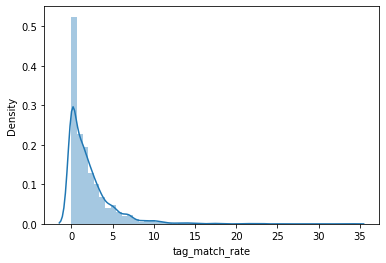

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

#sns.distplot(train['companySize'])
sns.distplot(train['tag_match_rate'])

In [ ]:
train.describe()

,userID,jobID,applied,companySize,tag_match_rate
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,97.994667,354.763833,0.142833,106.336667,2.133626
std,56.068014,206.711606,0.349932,189.462211,2.795348
min,0.000000,0.000000,0.000000,5.000000,0.000000
25%,47.000000,177.000000,0.000000,30.000000,0.000000
50%,96.000000,358.000000,0.000000,30.000000,1.292857
75%,148.000000,541.000000,0.000000,75.000000,3.000000
max,195.000000,707.000000,1.000000,1000.000000,34.000000


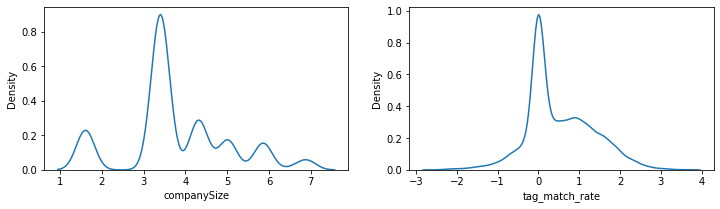

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,3))

train['companySize']=train.companySize.apply(lambda x: np.log(x, where =(x!=0)))
train['tag_match_rate']=train.tag_match_rate.apply(lambda x: np.log(x) if x!=0 else x)

test['companySize']=test.companySize.apply(lambda x: np.log(x, where =(x!=0)))
test['tag_match_rate']=test.tag_match_rate.apply(lambda x: np.log(x) if x!=0 else x)

sns.kdeplot(train['companySize'], ax=ax[0])
sns.kdeplot(train['tag_match_rate'], ax=ax[1])

In [ ]:
train.describe()

,userID,jobID,applied,companySize,tag_match_rate
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,97.994667,354.763833,0.142833,3.809083,0.509527
std,56.068014,206.711606,0.349932,1.253636,0.819364
min,0.000000,0.000000,0.000000,1.609438,-2.397895
25%,47.000000,177.000000,0.000000,3.401197,0.000000
50%,96.000000,358.000000,0.000000,3.401197,0.256839
75%,148.000000,541.000000,0.000000,4.317488,1.098612
max,195.000000,707.000000,1.000000,6.907755,3.526361


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

st_scaler1 = StandardScaler()
train['companySize']=st_scaler1.fit_transform(train['companySize'].values.reshape(-1,1))
test['companySize']=st_scaler1.transform(test['companySize'].values.reshape(-1,1))

st_scaler2 = StandardScaler()
train['tag_match_rate']=st_scaler2.fit_transform(train['tag_match_rate'].values.reshape(-1,1))
test['tag_match_rate']=st_scaler2.transform(test['tag_match_rate'].values.reshape(-1,1))

train.describe()

,userID,jobID,applied,companySize,tag_match_rate
count,6000.000000,6000.000000,6000.000000,6.000000e+03,6.000000e+03
mean,97.994667,354.763833,0.142833,-8.606819e-16,-3.890592e-16
std,56.068014,206.711606,0.349932,1.000083e+00,1.000083e+00
min,0.000000,0.000000,0.000000,-1.754759e+00,-3.548684e+00
25%,47.000000,177.000000,0.000000,-3.253892e-01,-6.219087e-01
50%,96.000000,358.000000,0.000000,-3.253892e-01,-3.084208e-01
75%,148.000000,541.000000,0.000000,4.055783e-01,7.190137e-01
max,195.000000,707.000000,1.000000,2.471954e+00,3.682226e+00


In [ ]:
y=train['applied']
x = train.drop('applied', axis=1)
x

,userID,jobID,companySize,tag_match_rate
0,195,51,-0.325389,-0.621909
1,17,51,-0.325389,-0.621909
2,157,51,-0.325389,-0.621909
3,107,51,-0.325389,-0.621909
4,74,51,-0.325389,-0.621909
...,...,...,...,...
5995,116,663,2.242457,-0.186565
5996,193,390,-0.325389,-0.621909
5997,149,553,-0.325389,-0.621909
5998,87,330,-1.754759,-0.327556


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True)

val_scores = list()
# 모델 정의
clf = RandomForestClassifier()

for i, (trn_idx, val_idx) in enumerate(skf.split(x, y)):
    x_train, y_train = x.iloc[trn_idx, :], y[trn_idx]
    x_valid, y_valid = x.iloc[val_idx, :], y[val_idx]
 
    # 모델 학습
    clf.fit(x_train, y_train)

    # 훈련, 검증 데이터 accuracy 확인
    #trn_accuracy = accuracy_score(y_train, clf.predict(x_train))
    val_accuracy  = accuracy_score(y_valid, clf.predict(x_valid))
    print('{} Fold validation accuracy : {:.4f}\n'.format(i, val_accuracy ))
    
    val_scores.append(val_accuracy)
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

0 Fold validation accuracy : 0.8383

1 Fold validation accuracy : 0.8583

2 Fold validation accuracy : 0.8567

3 Fold validation accuracy : 0.8567

4 Fold validation accuracy : 0.8517

5 Fold validation accuracy : 0.8500

6 Fold validation accuracy : 0.8533

7 Fold validation accuracy : 0.8550

8 Fold validation accuracy : 0.8533

9 Fold validation accuracy : 0.8550

Cross Validation Score : 0.8528


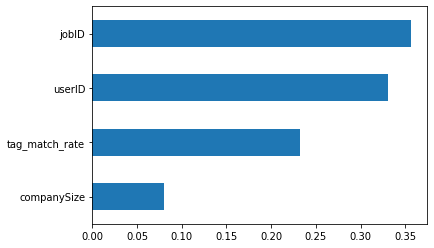

In [ ]:
pd.Series(clf.feature_importances_, x.columns).sort_values().plot.barh()

In [ ]:
from xgboost import XGBClassifier
# 모델 정의
clf = XGBClassifier()
val_scores = list()

for i, (trn_idx, val_idx) in enumerate(skf.split(x, y)):
    x_train, y_train = x.iloc[trn_idx, :], y[trn_idx]
    x_valid, y_valid = x.iloc[val_idx, :], y[val_idx]
 
    # 모델 학습
    clf.fit(x_train, y_train,
            eval_set = [[x_valid, y_valid]], 
            eval_metric = 'error',        
            early_stopping_rounds = 100,
            verbose = 100)

    # 훈련, 검증 데이터 accuracy 확인
    #trn_accuracy = accuracy_score(y_train, clf.predict(x_train))
    val_accuracy  = accuracy_score(y_valid, clf.predict(x_valid))
    print('{} Fold validation accuracy : {:.4f}\n'.format(i, val_accuracy ))
    
    val_scores.append(val_accuracy)
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

[0]	validation_0-error:0.141667
Will train until validation_0-error hasn't improved in 100 rounds.
[99]	validation_0-error:0.136667
0 Fold validation accuracy : 0.8633

[0]	validation_0-error:0.138333
Will train until validation_0-error hasn't improved in 100 rounds.
[99]	validation_0-error:0.14
1 Fold validation accuracy : 0.8617

[0]	validation_0-error:0.141667
Will train until validation_0-error hasn't improved in 100 rounds.
[99]	validation_0-error:0.14
2 Fold validation accuracy : 0.8600

[0]	validation_0-error:0.146667
Will train until validation_0-error hasn't improved in 100 rounds.
[99]	validation_0-error:0.146667
3 Fold validation accuracy : 0.8567

[0]	validation_0-error:0.146667
Will train until validation_0-error hasn't improved in 100 rounds.
[99]	validation_0-error:0.146667
4 Fold validation accuracy : 0.8567

[0]	validation_0-error:0.145
Will train until validation_0-error hasn't improved in 100 rounds.
[99]	validation_0-error:0.141667
5 Fold validation accuracy : 0.858

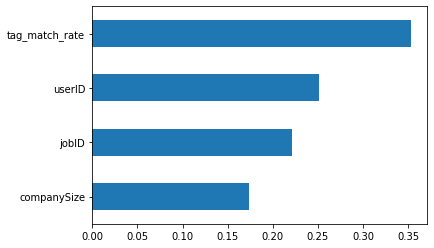

In [ ]:
pd.Series(clf.feature_importances_, x.columns).sort_values().plot.barh()

In [ ]:
final_predict=clf.predict(test)
submission = pd.DataFrame(final_predict, columns=['applied'])
submission
submission.to_csv('./rf_submission.csv', index=False)
